In [12]:
import yt
import numpy as np
from matplotlib import pyplot as plt
yt.set_log_level('critical')

In [7]:
path_shot33 = 'D:/Simulation/FLASH/2D/PHELIX2023/shot33/'
name = 'lasslab_hdf5_plt_cnt_????'

In [4]:
def find_nearest(array, value):
    """
    Function finds array element closest to the given value and returns the index of this element.
    Used, to find the plot file to a given time.

    :param array: np.array; array, that is compared with value
    :param value: float; function finds element in array, that is closest to value
    :return: int; index of element in array that is closest to value
    """
    idx = (np.abs(array - value)).argmin()
    return idx

In [10]:
def get_dataset(path, t):
    ts = yt.load(path)
    times = []
    for ds in ts:
        times.append(ds.current_time.in_units('ns'))
    ts_ind = find_nearest(np.array(times), t)
    return ts[ts_ind]

In [15]:
ds_1 = get_dataset(path_shot33+name, 1)
ds_1.derived_field_list

[('flash', 'cell_volume'),
 ('flash', 'cham'),
 ('flash', 'dens'),
 ('flash', 'depo'),
 ('flash', 'dr'),
 ('flash', 'dtheta'),
 ('flash', 'dz'),
 ('flash', 'lase'),
 ('flash', 'path_element_r'),
 ('flash', 'path_element_theta'),
 ('flash', 'path_element_z'),
 ('flash', 'pres'),
 ('flash', 'r'),
 ('flash', 'sumy'),
 ('flash', 'targ'),
 ('flash', 'tele'),
 ('flash', 'theta'),
 ('flash', 'tion'),
 ('flash', 'trad'),
 ('flash', 'volume'),
 ('flash', 'ye'),
 ('flash', 'z'),
 ('gas', 'El_number_density'),
 ('gas', 'averaged_density'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_r'),
 ('gas', 'density_gradient_theta'),
 ('gas', 'density_gradient_z'),
 ('gas', 'dr'),
 ('gas', 'dtheta'),
 ('gas', 'dynamical_time'),
 ('gas', 'dz'),
 ('gas', 'ion_number_density'),
 ('gas', 'mass'),
 ('gas', 'mean_molecular_weight'),
 ('gas', 'number_density'),
 ('gas', 'optical_depth'),
 ('gas', 'path_element_r'),
 ('gas',

In [19]:
ds_1.gamma

1.6666666666666667

In [18]:
print(ds_1.field_info['gas', 'sound_speed'].get_source())

    def _sound_speed(field, data):
        tr = data.ds.gamma * data[ftype, "pressure"] / data[ftype, "density"]
        return np.sqrt(tr)



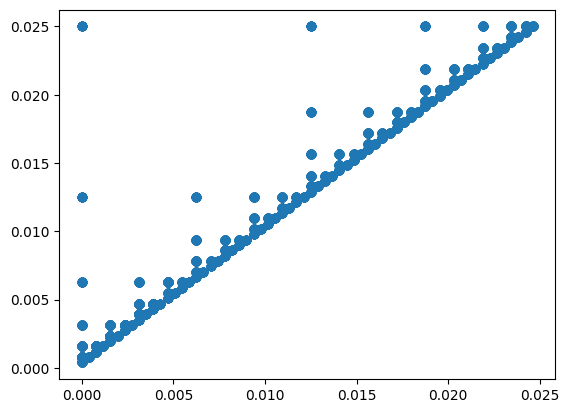

: 

In [29]:
plt.scatter(ds_1.index.grid_left_edge[:,:1], ds_1.index.grid_right_edge[:,:1])